**Tutorial 7 - Monte Carlo Calculation $\pi$**

Here we will do a little warm up exercise in Monte Carlo calculations.


1) Imagine a circle circumscribed by a square.  The probability of a random point within the square being inside the circle is equal to the ratio of the area of the circle to the area of the square.  Use a uniform random number generator to calculate the value of $\pi$.  Use 1,000 and 10,000 points.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import gamma

n = (1000, 10000)
pi = np.empty(2)

x = [np.random.uniform(0,1,n[i]) for i in range(len(n))]
y = [np.random.uniform(0,1,n[i]) for i in range(len(n))]

#print('CHECK! length x0 =', len(x[0]), 'CHECK! length x1 =', len(x[1]))
#print('CHECK! length y0 =', len(y[0]), 'CHECK! length y1 =', len(y[1]))

area = [np.sqrt(x[i]**2 + y[i]**2) for i in range(len(n))]

#print('CHECK! length area0 =', len(area[0]), 'CHECK! length area1 =', len(area[1]))

cts = [0,0]

for i in range(len(n)) :

    for a in area[i] :
        cts[i] += 1 if a < 1.0 else 0
        
    pi[i] = 4 * (cts[i]/n[i])

print('CHECK! pi greco (n=1000) = ', pi[0], 'pi greco (n=10000) = ', pi[1])


CHECK! pi greco (n=1000) =  3.168 pi greco (n=10000) =  3.1204


2) Repeat the calculations above in a loop and record the values of $\pi$.  Make a histogram of your calculated $\pi$ values.  What is the variance of your estimate of $\pi$ using 1,000 and 10,000?  How does it scale with the number of points?

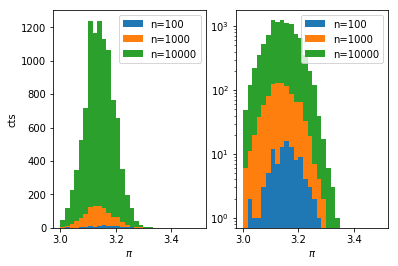

for n=100, pi var =  0.0025015424000000013 
for n=1000, pi var =  0.002592001536000003 
for n=10000, pi var =  0.002729280591360003


In [3]:
def MCpi(n) :

    x = np.random.uniform(0,1,n) 
    y = np.random.uniform(0,1,n) 
    area = np.sqrt(x**2 + y**2) 
    cts = 0

    for a in area :
        cts += 1 if a < 1.0 else 0

    pi = 4 * (cts/n)

    return pi


pi1 = [MCpi(1000) for i in range(100)]
pi2 = [MCpi(1000) for i in range(1000)]
pi3 = [MCpi(1000) for i in range(10000)]

        

#print('CHECK!', pi)
plt.subplot(1,2,2)

_ = plt.hist(pi1, range=[3, 3.5], bins=30, alpha=1, zorder=2, log=True, label='n=100')
_ = plt.hist(pi2, range=[3, 3.5], bins=30, alpha=1, zorder=1, log=True, label='n=1000')
_ = plt.hist(pi3, range=[3, 3.5], bins=30, alpha=1, zorder=0, log=True, label='n=10000')
_ = plt.xlabel(r'$\pi$')
_ = plt.ylabel('cts')
_ = plt.legend(loc=0)

plt.subplot(1,2,1)

_ = plt.hist(pi1, range=[3, 3.5], bins=30, alpha=1, zorder=2, label='n=100')
_ = plt.hist(pi2, range=[3, 3.5], bins=30, alpha=1, zorder=1, label='n=1000')
_ = plt.hist(pi3, range=[3, 3.5], bins=30, alpha=1, zorder=0, label='n=10000')
_ = plt.xlabel(r'$\pi$')
_ = plt.ylabel('cts')
_ = plt.legend(loc=0)

plt.show()

var1 = np.var(pi1)
var2 = np.var(pi2)
var3 = np.var(pi3)

print('for n=100, pi var = ', var1, '\nfor n=1000, pi var = ', var2, '\nfor n=10000, pi var = ', var3)

3) What was done above in two dimensions can be done in more dimensions.  Calculate the volume of a 5 dimensional ball of unit radius in the same way.  Calculate its variance of your estimate in the same way.  Use enough points to get three significant figures.

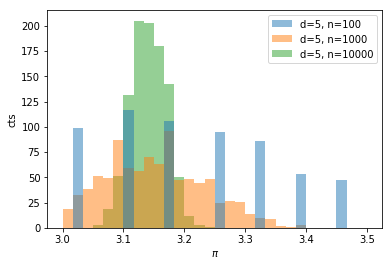

In [9]:

# vol1 = pi^n/2 * R^n / gamma(n/2+1 ) 
# vol2 = (2R)^n
# pi = 2^2 * gamma(n/2+1)^2/n * cts/tot

def MCpi_multi(d,n) :

    x = np.random.uniform(0,1,(d,n)) 
    area = [np.sqrt(np.sum(x[i]**2 for i in range(d))) for i in range(n)]
    cts = 0

    for a in area[i] :
        cts += 1 if a < 1.0 else 0

    pi = 4 * (sp.special.gamma(d/2+1) * (cts/n))**(2/d)

    return pi
                   
pi1_array = [MCpi_multi(5,100) for i in range(1000)]
pi2_array = [MCpi_multi(5,1000) for i in range(1000)]
pi3_array = [MCpi_multi(5,10000) for i in range(1000)]


                   
#print('CHECK!', pi_array)
                   
_ = plt.hist(pi1_array, range=[3, 3.5], bins=30, alpha=0.5, zorder=2, label='d=5, n=100')
_ = plt.hist(pi2_array, range=[3, 3.5], bins=30, alpha=0.5, zorder=1, label='d=5, n=1000')
_ = plt.hist(pi3_array, range=[3, 3.5], bins=30, alpha=0.5, zorder=0, label='d=5, n=10000')
_ = plt.xlabel(r'$\pi$')
_ = plt.ylabel('cts')
_ = plt.legend(loc=0)

plt.show()
